#### k均值聚类算法  
**输入**：$n$个样本的集合$X$；  
**输出**：样本集合的聚类$C^*$  
（1）初始化。令$t=0$，随机选择$k$个样本点作为初始聚类中心$m^{(0)}=(m_1^{(0)},...m_l^{(0)},...m_k^{(0)})$。  
（2）对样本进行聚类。对固定的类中心$m^{(t)}=(m_1^{(t)},...m_l^{(t)},...m_k^{(t)})$，其中$m_l^{(t)}$为类$G_l$的中心，计算每个样本到类中心的距离，将每个样本指派到与其最近的中心的类中，构成聚类结果$C^{(t)}$。  
（3）计算新的类中心。对聚类结果$C^{(t)}$，计算当前各个类中样本的均值，作为新的类中心$m^{(t+1)}=(m_1^{(t+1)},...m_l^{(t+1)},...m_k^{(t+1)})$。  
（4）如果迭代收敛或符合停止条件，输出$C^*=C^{(t)}$  
&emsp;否则，令$t=t+1$，返回步（2）。  
k均值聚类算法的复杂度是$O(mmk)$，其中$m$是样本维数，$n$是样本个数，$k$是类别个数。

In [1]:
import math
import random 
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

#### 加载文件  
$param file$:要加载的文件路径--鸢尾花数据集   
*return*: 数据集和标签集

In [2]:
def load_data(file):
    Xlist = []
    Ylist = []
    fr = open(file)
    for line in fr.readlines():
        cur = line.split(',')
        label = cur[-1]
        X = [float(x) for x in cur[:-1]]
        Xlist.append(X)
        Ylist.append(label)
    Xarray = np.array(Xlist)
    print('Data shape:', Xarray.shape)
    print('Length of labels:', len(Ylist))
    return Xarray, Ylist

#### 定义标准化函数，对每一列特征进行min-max标准化  
$param Xarray$:特征数据数组  
*return*: 标准化处理后的特征数据数组

In [3]:
def Normalize(Xarray):
    for f in range(Xarray.shape[1]):
        maxf = np.max(Xarray[:, f])
        minf = np.min(Xarray[:, f])
        for n in range(Xarray.shape[0]):
            Xarray[n][f] = (Xarray[n][f]-minf) / (maxf-minf) 
    return Xarray

#### 定义计算两条数据间的距离的函数(欧式距离)  
$param xi$:第i条特征数据   
$param xj$:第j条特征数据  
*return*:两条数据的欧式距离

In [4]:
def cal_distance(xi, xj):
    dist = 0
    for col in range(len(xi)):
        dist += (xi[col]-xj[col]) ** 2
    dist = math.sqrt(dist)
    return dist

#### 定义计算类中心的函数  
$param group$:类所包含的数据列表  
$param Xarray$:特征数据数组  
*return*:新的类中心

In [5]:
def cal_groupcenter(group, Xarray):
    center = np.zeros(Xarray.shape[1])
    for i in range(Xarray.shape[1]):
        for n in group:
            center[i] += Xarray[n][i]
    center = center / Xarray.shape[0]
    return center

#### 定义计算调整兰德系数(ARI)的函数  
$param group_dict$:类别字典  
$param Ylist$:类别标签列表  
*return*:调整兰德系数

In [6]:
def Adjusted_Rand_Index(group_dict, Ylist, k):
    group_array = np.zeros((k, k))
    ylabel = list(set(Ylist))
    y_dict = {i:[] for i in range(k)}
    for i in range(len(Ylist)):
        y_dict[ylabel.index(Ylist[i])].append(i)
    for i in range(k):
        for j in range(k):
            for n in range(len(Ylist)):
                if n in group_dict[i] and n in y_dict[j]:
                    group_array[i][j] += 1 
    RI = 0
    sum_i = np.zeros(k)
    sum_j = np.zeros(k)
    for i in range(k):
        for j in range(k):
            sum_i[i] += group_array[i][j]
            sum_j[j] += group_array[i][j]
            if group_array[i][j] >= 2:
                RI += comb(group_array[i][j], 2)
    ci = 0 
    cj = 0 
    for i in range(k):
        if sum_i[i] >= 2:
            ci += comb(sum_i[i], 2)
    for j in range(k):
        if sum_j[j] >= 2:
            cj += comb(sum_j[j], 2)
    E_RI = ci * cj / comb(len(Ylist), 2)
    max_RI = (ci + cj) / 2
    return (RI-E_RI) / (max_RI-E_RI)

#### 定义k均值聚类函数   
$param Xarray$:特征数据数组  
$param k$:设定的类别数  
$param iters$:设定的迭代次数  
*return*:调整兰德系数

In [7]:
def Kmeans(Xarray, k, iters):
    center_inds = random.sample(range(Xarray.shape[0]), k) 
    centers = [Xarray[ci] for ci in center_inds] 
    scores = []
    for i in range(iters):
        group_dict = {i:[] for i in range(k)}
        print('{}/{}'.format(i+1, iters))
        for n in range(Xarray.shape[0]):
            dists = []
            for ci in range(k):
                dist = cal_distance(Xarray[n], centers[ci])
                dists.append(dist)
            g = dists.index(min(dists))
            group_dict[g].append(n)
        print(group_dict)
        for i in range(k):
            centers[i] = cal_groupcenter(group_dict[i], Xarray)
        scores.append(Adjusted_Rand_Index(group_dict, Ylist, k))
    return group_dict, scores

#### 开始实验

Data shape: (150, 4)
Length of labels: 150
1/3
{0: [50, 52, 100, 102, 104, 105, 107, 108, 109, 112, 117, 118, 120, 122, 124, 125, 129, 130, 131, 135, 136, 139, 140, 141, 143, 144, 145], 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 57, 59, 60, 62, 64, 67, 69, 79, 80, 81, 82, 89, 93, 98], 2: [51, 54, 55, 56, 58, 61, 63, 65, 66, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 97, 99, 101, 103, 106, 110, 111, 113, 114, 115, 116, 119, 121, 123, 126, 127, 128, 132, 133, 134, 137, 138, 142, 146, 147, 148, 149]}
2/3
{0: [], 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 2: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71

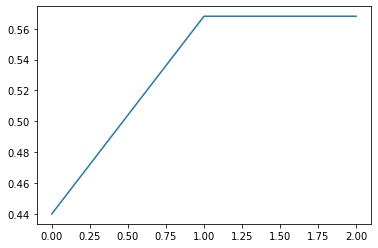

In [11]:
# 加载数据
Xarray, Ylist = load_data('iris/iris.data')

# 对特征数据进行标准化处理
Xarray = Normalize(Xarray)  

# 设定聚类数为3
k = 3  

# 设定迭代次数为2
iters = 3  

# 进行k均值聚类
group_dict, scores = Kmeans(Xarray, k, iters)  

# 绘制ARI得分折线图
plt.plot(range(iters), scores)  
plt.show()